# Kindle PaperWhite - Understanding Customer Needs

This project focusses on the following areas :
    
   - Analysis of the dataset
   - Understanding of the User's Rating Distribution
   - Predict Recommend Status based on the subjective review provided by the user
   - Understand reason behind rejecting the product

### Approach

1. Clean the Dataset
    - Clean Column names 
    - Clean Categories
    - Clean Keys
2. Analysis of Data
3. Transforming Date Time
    - Parse ReviewDate to [Date and Time]
    - Parse ReviewDateAdded to [Date and Time]
    - Parse ReviewDateSeen to [Date and Time]
4. Likert Scale Analysis : 
    - 5 Point NPS Breakdown
    - Ratings from 0-3  :  Detractors
    - Ratings from 4  : Passive
    - Ratings from 5  : Promoter
5. Feature Engineering
6. Apply NLTK - Sentiment Analysis to find Compound Score
7. Understanding the Fearures Added
8. Using TF-IDF and Random Forest to predict Recommendation Status
9. Identifying which features led to rejection and can be improved

# 1. Cleaning the Dataset


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
add = "Review.csv"
df = pd.read_csv(add)
df1_oasis = df.iloc[2816:3482,]
df2_fire_16gb = df.iloc[14448:15527,]
df3_paperwhite_4gb = df.iloc[17216:20392,]
df4_voyage = df.iloc[20392:20972,]
df5_paperwhite = df.iloc[20989:21019,]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Exploring individual Dataframes

In [2]:
print(df1_oasis.shape)
print(df2_fire_16gb.shape)
print(df3_paperwhite_4gb.shape)
print(df4_voyage.shape)
print(df5_paperwhite.shape)

(666, 21)
(1079, 21)
(3176, 21)
(580, 21)
(30, 21)


We focus our attention on Kindle Paperwhite (df3 and df5), while saving other dataframes for later use

In [3]:
df1_oasis.to_csv('Oasis.csv')
df2_fire_16gb.to_csv('Fire.csv')
df4_voyage.to_csv('Voyage.csv')

#### Combining df3 and df5 for Kindle Paperwhite Edition Data Only

In [4]:
frames = [df3_paperwhite_4gb,df5_paperwhite]
df4_voyage.to_csv('Voyage.csv')
kp = pd.concat(frames)
kp.to_csv('KindlePaperWhite.csv')
kp = kp.reset_index()

print(kp['reviews.rating'].describe())
kp.columns = ['Index','ID','Name','ASINS','Brand','Categories','Keys','Manufacturer','ReviewDate','ReviewDateAdded','ReviewDateSeen','PurchasedOnReview','RecommendStatus','ReviewID','ReviewHelpful','Rating','SourceURL','Comments','Title','UserCity','UserProvince','Username']




count    3206.000000
mean        4.753275
std         0.566303
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews.rating, dtype: float64


In [5]:

kp = kp.drop(['ReviewID' , 'UserCity' , 'UserProvince','PurchasedOnReview'],axis = 1)

print(kp.Rating.value_counts())



5.0    2564
4.0     545
3.0      60
2.0      22
1.0      15
Name: Rating, dtype: int64


In [6]:
kp.columns

Index(['Index', 'ID', 'Name', 'ASINS', 'Brand', 'Categories', 'Keys',
       'Manufacturer', 'ReviewDate', 'ReviewDateAdded', 'ReviewDateSeen',
       'RecommendStatus', 'ReviewHelpful', 'Rating', 'SourceURL', 'Comments',
       'Title', 'Username'],
      dtype='object')

# 2. Analysis of Data

    User Rating Count Distribution
    Rating          No            Percentage
    5                   2564         79.97% 
    4                   545           16.99%
    3                   60             1.87%
    2                   22             0.686%
    1                   15             0.467%




In [7]:
#slice for rating 5
# slice for recommended
#slice for comments

In [8]:
kp['Categories'] = 'Tablets'
kp['Name'] = 'Amazon Kindle Paperwhite'

print(kp.ReviewHelpful.value_counts())


0.0      2861
1.0       261
2.0        38
3.0        17
4.0        10
5.0         4
6.0         2
34.0        2
26.0        1
11.0        1
103.0       1
43.0        1
18.0        1
12.0        1
7.0         1
8.0         1
24.0        1
17.0        1
32.0        1
Name: ReviewHelpful, dtype: int64


 Let's see the Unique User Names / Shape of the Dataset and the the ' number ' of unique Usernames

In [9]:
print(kp.Username.nunique())
print(kp.shape)
sum(kp['Username'].value_counts()>1)

2890
(3206, 18)


188

### NOTES : 
Understanding the Rating distribution


There are total of 2890 unique users , however the total ratings received are 3206, so that means some people are giving their ratings more than once, so we need to figure out if the extra 316 ratings are from people who have already provided ratings, and if yes are they from the same date and how many products

there are 188 people who had given more than 1 rating

In [10]:
len(kp['Username'].value_counts()>1)

2890

We now have names of people who provided more than one comment we now need to figure out the dates when people with THESE NAMES provided their comments. Select dates on which these people added reviews, sort by Username 

In [11]:
kp.head(2)
kp = kp.drop('Keys',axis = 1)
print(kp.columns.nunique())
kp =kp.reset_index()
print(kp.head(2))

17
   index  Index                    ID                      Name       ASINS  \
0      0  17216  AVqVGWLKnnc1JgDc3jF1  Amazon Kindle Paperwhite  B018Y23MNM   
1      1  17217  AVqVGWLKnnc1JgDc3jF1  Amazon Kindle Paperwhite  B018Y23MNM   

    Brand Categories Manufacturer                ReviewDate  \
0  Amazon    Tablets       Amazon  2017-02-05T00:00:00.000Z   
1  Amazon    Tablets       Amazon  2017-02-05T00:00:00.000Z   

        ReviewDateAdded                                     ReviewDateSeen  \
0  2017-06-21T07:38:39Z  2017-06-04T02:18:03.660Z,2017-06-03T18:42:15.341Z   
1  2017-06-21T07:38:39Z  2017-06-04T02:18:03.660Z,2017-06-03T18:42:15.341Z   

  RecommendStatus  ReviewHelpful  Rating  \
0            True            0.0     5.0   
1            True            0.0     5.0   

                                           SourceURL  \
0  http://reviews.bestbuy.com/3545/5026300/review...   
1  http://reviews.bestbuy.com/3545/5026300/review...   

                                

# 3. Transforming Date Time
    - Parse ReviewDate to [Date and Time]
    - Parse ReviewDateAdded to [Date and Time]
    - Parse ReviewDateSeen to [Date and Time]

In [12]:
kp.ReviewDate = pd.to_datetime(kp['ReviewDate'], dayfirst= True)
kp.ReviewDateAdded =pd.to_datetime(kp.ReviewDateAdded , dayfirst= True)
#kp.ReviewDateSeen = pd.to_datetime(kp.ReviewDateSeen, dayfirst = True)

In [13]:
kp['ReviewDateSeen'] = kp['ReviewDateSeen'].str.split(',',expand = True).apply(lambda x:x.str.strip())
kp.ReviewDateSeen = pd.to_datetime(kp.ReviewDateSeen,dayfirst= True)   
print(kp.head(4))

   index  Index                    ID                      Name       ASINS  \
0      0  17216  AVqVGWLKnnc1JgDc3jF1  Amazon Kindle Paperwhite  B018Y23MNM   
1      1  17217  AVqVGWLKnnc1JgDc3jF1  Amazon Kindle Paperwhite  B018Y23MNM   
2      2  17218  AVqVGWLKnnc1JgDc3jF1  Amazon Kindle Paperwhite  B018Y23MNM   
3      3  17219  AVqVGWLKnnc1JgDc3jF1  Amazon Kindle Paperwhite  B018Y23MNM   

    Brand Categories Manufacturer ReviewDate     ReviewDateAdded  \
0  Amazon    Tablets       Amazon 2017-02-05 2017-06-21 07:38:39   
1  Amazon    Tablets       Amazon 2017-02-05 2017-06-21 07:38:39   
2  Amazon    Tablets       Amazon 2017-02-05 2017-06-21 07:38:39   
3  Amazon    Tablets       Amazon 2017-02-04 2017-06-21 07:38:39   

           ReviewDateSeen RecommendStatus  ReviewHelpful  Rating  \
0 2017-06-04 02:18:03.660            True            0.0     5.0   
1 2017-06-04 02:18:03.660            True            0.0     5.0   
2 2017-06-04 02:18:03.660            True            0.0   

# 4. Likert Scale Analysis

### Net Promoter Score

In [14]:
import numpy as np
promoters = sum(kp.Rating==5)
passive = sum(kp.Rating == 4)
detractors = sum(np.logical_and(kp.Rating >= 1, kp.Rating <=3))
respondents = promoters+passive+detractors
NPS_P = ((promoters - detractors)/respondents )*100
print(NPS_P)

76.94946974422957


Promters had a NPS of 80.324.


This is the overall NPS of the product, however, let's visualize how the rating of KindlePaperWhite has changed over time

In [15]:
print(kp.tail(2))

      index  Index                    ID                      Name  \
3204   3204  21017  AVphPmHuilAPnD_x3E5h  Amazon Kindle Paperwhite   
3205   3205  21018  AVphPmHuilAPnD_x3E5h  Amazon Kindle Paperwhite   

           ASINS   Brand Categories Manufacturer ReviewDate ReviewDateAdded  \
3204  B00IOY8XWQ  Amazon    Tablets       Amazon 2016-05-21             NaT   
3205  B00IOY8XWQ  Amazon    Tablets       Amazon 2016-05-20             NaT   

     ReviewDateSeen RecommendStatus  ReviewHelpful  Rating  \
3204     2017-08-31            True            0.0     4.0   
3205     2017-08-31            True            1.0     5.0   

                                              SourceURL  \
3204  http://reviews.bestbuy.com/3545/9302088/review...   
3205  http://reviews.bestbuy.com/3545/9302088/review...   

                                               Comments                 Title  \
3204  This is the first e-reader I've gotten and I L...  Great first e-reader   
3205  I previously had a

All dates are different, so we hae to calculate NPS for interval of 2 months Plot a line chart for the same

###  Pivot Table for Promoter Score by Date

In [16]:
review_date = kp.ReviewDate
rating = kp.Rating
df_dr = pd.concat([review_date,rating],axis = 1)
print(df_dr.tail(5))
print(df_dr.shape)

     ReviewDate  Rating
3201 2016-05-24     4.0
3202 2016-05-23     5.0
3203 2016-05-22     4.0
3204 2016-05-21     4.0
3205 2016-05-20     5.0
(3206, 2)


In [17]:
df_dr = df_dr.groupby(['ReviewDate','Rating']).size().unstack(fill_value = 0)
print(df_dr.loc['2017-02-04'])


Rating
1.0     1
2.0     0
3.0     1
4.0     5
5.0    11
Name: 2017-02-04 00:00:00, dtype: int64


In [18]:
print(df_dr.head(5))

Rating      1.0  2.0  3.0  4.0  5.0
ReviewDate                         
2015-07-03    0    0    0    0   10
2015-07-04    0    0    0    0    1
2015-07-05    0    0    0    0    1
2015-07-06    0    0    0    0    2
2015-07-08    0    0    0    1    3


So we  now have rating distribution by date, let's now calculate the sum of ratings for 1,2 and 3 for each date,and finally add a new column to the df, while deleting 1,2,3

In [19]:
df_dr.columns = ['A','B','C','Passive','Promoters']
df_dr['Detractors'] = df_dr['A'] + df_dr['B'] + df_dr['C']
df_dr.head(5)

,A,B,C,Passive,Promoters,Detractors
ReviewDate,,,,,,
2015-07-03,0,0,0,0,10,0
2015-07-04,0,0,0,0,1,0
2015-07-05,0,0,0,0,1,0
2015-07-06,0,0,0,0,2,0
2015-07-08,0,0,0,1,3,0


In [20]:
df_dr = df_dr.drop(labels = ['A','B','C'],axis = 1)
print(df_dr.head(5))

            Passive  Promoters  Detractors
ReviewDate                                
2015-07-03        0         10           0
2015-07-04        0          1           0
2015-07-05        0          1           0
2015-07-06        0          2           0
2015-07-08        1          3           0


In [21]:
df_dr['NPS'] = (df_dr['Promoters'] - df_dr['Detractors']) * 100 / (df_dr['Passive'] + df_dr['Promoters'] + df_dr['Detractors'])
print(df_dr.head(5))

            Passive  Promoters  Detractors    NPS
ReviewDate                                       
2015-07-03        0         10           0  100.0
2015-07-04        0          1           0  100.0
2015-07-05        0          1           0  100.0
2015-07-06        0          2           0  100.0
2015-07-08        1          3           0   75.0


In [22]:
df_dr.shape

(628, 4)

# 5. Feature Engineering  
# 6. Sentiment Analysis - NLTK to find Compound Score

In [23]:
kp.Name.nunique()
kp.head(2)
    

,index,Index,ID,Name,ASINS,Brand,Categories,Manufacturer,ReviewDate,ReviewDateAdded,ReviewDateSeen,RecommendStatus,ReviewHelpful,Rating,SourceURL,Comments,Title,Username
0,0,17216,AVqVGWLKnnc1JgDc3jF1,Amazon Kindle Paperwhite,B018Y23MNM,Amazon,Tablets,Amazon,2017-02-05,2017-06-21 07:38:39,2017-06-04 02:18:03.660,True,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,Was a gift for our 8 year old daughter. Great ...,Great for kids,Bubba
1,1,17217,AVqVGWLKnnc1JgDc3jF1,Amazon Kindle Paperwhite,B018Y23MNM,Amazon,Tablets,Amazon,2017-02-05,2017-06-21 07:38:39,2017-06-04 02:18:03.660,True,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,my grandkids love it. This is the 3 one we bou...,kids love it,skeet


#### Columns to Remove : Index - ID - Name - ASINS - Brand - ReviewDateAdded - ReviewDateSeen - SourceURL

In [24]:
data =  kp.drop(['Index','ID','Name','ASINS','Brand','Categories','Manufacturer','ReviewDateAdded','ReviewDateSeen','SourceURL'], axis = 1)
# Cleaned Dataset Now becomes
data = data.reset_index()
data.head(5)


,level_0,index,ReviewDate,RecommendStatus,ReviewHelpful,Rating,Comments,Title,Username
0,0,0,2017-02-05,True,0.0,5.0,Was a gift for our 8 year old daughter. Great ...,Great for kids,Bubba
1,1,1,2017-02-05,True,0.0,5.0,my grandkids love it. This is the 3 one we bou...,kids love it,skeet
2,2,2,2017-02-05,True,0.0,3.0,Great case ok tablet no Android play store. We...,Tablet not for kids,Kidsphone
3,3,3,2017-02-04,True,0.0,3.0,Grandson became board with what it offers. Plu...,Good for young kids,Shannon
4,4,4,2017-02-04,False,0.0,1.0,This product wouldn't turn on nor charge and t...,Product Issues,FitnessBuff


In [25]:
data = data.drop(['ReviewDate'], axis = 1)
data.columns

Index(['level_0', 'index', 'RecommendStatus', 'ReviewHelpful', 'Rating',
       'Comments', 'Title', 'Username'],
      dtype='object')

#### Changing RecommendStatus from True/False to Recommend/Not Recommend

In [26]:
def status(data):
    if(data == True):
        data = "Recommend"
        return data
    else:
        data = "Not Recommend"
        return data
    
data['RecommendStatus'] = pd.DataFrame(data['RecommendStatus'].apply(lambda x : status(x)))
data.head(5)
    

,level_0,index,RecommendStatus,ReviewHelpful,Rating,Comments,Title,Username
0,0,0,Recommend,0.0,5.0,Was a gift for our 8 year old daughter. Great ...,Great for kids,Bubba
1,1,1,Recommend,0.0,5.0,my grandkids love it. This is the 3 one we bou...,kids love it,skeet
2,2,2,Recommend,0.0,3.0,Great case ok tablet no Android play store. We...,Tablet not for kids,Kidsphone
3,3,3,Recommend,0.0,3.0,Grandson became board with what it offers. Plu...,Good for young kids,Shannon
4,4,4,Not Recommend,0.0,1.0,This product wouldn't turn on nor charge and t...,Product Issues,FitnessBuff


In [27]:
from random import seed
from random import randrange



def status(data):
    if(data == "Recommend"):
        data = 1
        return data
    else:
        data = 0
        return data
    
data['RNum'] = pd.DataFrame(data['RecommendStatus'].apply(lambda x : status(x)))

In [28]:
dsa = data
dsa['feedback'] = dsa['Comments'] + dsa['Title']
dsa = dsa.drop(['Comments','Title'], axis = 1)


In [29]:
dsa.head(5)

,level_0,index,RecommendStatus,ReviewHelpful,Rating,Username,RNum,feedback
0,0,0,Recommend,0.0,5.0,Bubba,1,Was a gift for our 8 year old daughter. Great ...
1,1,1,Recommend,0.0,5.0,skeet,1,my grandkids love it. This is the 3 one we bou...
2,2,2,Recommend,0.0,3.0,Kidsphone,1,Great case ok tablet no Android play store. We...
3,3,3,Recommend,0.0,3.0,Shannon,1,Grandson became board with what it offers. Plu...
4,4,4,Not Recommend,0.0,1.0,FitnessBuff,0,This product wouldn't turn on nor charge and t...


In [30]:
dsa.RecommendStatus.value_counts()

Recommend        3140
Not Recommend      66
Name: RecommendStatus, dtype: int64

### Base Classifier

In [31]:
# def zero_rule_algorithm_classification(train,test):
#     output_values = [row[-1] for row in train]
#     prediction = max(set(output_values), key=output_values.count)
#     predicted = [prediction for i in range(len(train))]
#     return predicted


# t_length = len(dsa.RNum)
# train = dsa.RNum[0:2565]
# train = train.tolist()
# test_length = len(dsa.RNum) - 2565
# test = dsa.RecommendStatus[2565: 2566+test_length]
# test = test.tolist()
# predictions = zero_rule_algorithm_classification(train, test)
# print(predictions)

#### Feature for Compound Score (using Sentiment Analysis)

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def polar_score(text):
    score = sid.polarity_scores(text)
    x = score['compound']
    return x


dsa['Compound_Score'] = dsa['feedback'].apply(lambda x : polar_score(x))

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [33]:
dsa.head(5)


,level_0,index,RecommendStatus,ReviewHelpful,Rating,Username,RNum,feedback,Compound_Score
0,0,0,Recommend,0.0,5.0,Bubba,1,Was a gift for our 8 year old daughter. Great ...,0.7906
1,1,1,Recommend,0.0,5.0,skeet,1,my grandkids love it. This is the 3 one we bou...,0.8555
2,2,2,Recommend,0.0,3.0,Kidsphone,1,Great case ok tablet no Android play store. We...,0.9457
3,3,3,Recommend,0.0,3.0,Shannon,1,Grandson became board with what it offers. Plu...,0.0000
4,4,4,Not Recommend,0.0,1.0,FitnessBuff,0,This product wouldn't turn on nor charge and t...,0.0000


In [34]:
#df = df[['a', 'y', 'b', 'x']]
dsa = dsa[['level_0','index','ReviewHelpful','Rating','Username','RNum','feedback','Compound_Score','RecommendStatus']]

#### Feature for Text Length

In [35]:
dsa['length'] = dsa['feedback'].apply(lambda x: len(x) - x.count(" "))
dsa.head(2)

,level_0,index,ReviewHelpful,Rating,Username,RNum,feedback,Compound_Score,RecommendStatus,length
0,0,0,0.0,5.0,Bubba,1,Was a gift for our 8 year old daughter. Great ...,0.7906,Recommend,55
1,1,1,0.0,5.0,skeet,1,my grandkids love it. This is the 3 one we bou...,0.8555,Recommend,50


# 7. Understanding the  Features added

#### Ideally people who'll Not Recommend the product, would have a lot to say against the features of the product

In [36]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


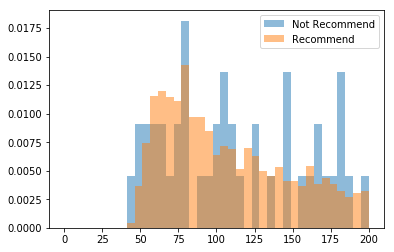

In [37]:
bins = np.linspace(0,200,40)
pyplot.hist(dsa[dsa['RecommendStatus'] == 'Not Recommend']['length'],bins,alpha  = 0.5,normed = True, label = 'Not Recommend')
pyplot.hist(dsa[dsa['RecommendStatus'] == 'Recommend']['length'],bins,alpha = 0.5,normed = True, label = 'Recommend')
pyplot.legend(loc = 'upper right')
pyplot.show()

In [38]:
dsa.RecommendStatus.value_counts()

Recommend        3140
Not Recommend      66
Name: RecommendStatus, dtype: int64

#### Above graph shows that our original hypothesis was correct

# 8. Using TF-IDF and Random Forest to predict Recommendation Status

In [39]:
import string
import re
stopword =  nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [40]:
def clean(text):
    no_punct = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',no_punct)
    
    text_stem = ([ps.stem(word) for word in tokens if word not in stopword])
    return text_stem

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(analyzer= clean)
Xtf_idfVector = tf_idf.fit_transform(dsa['feedback'])

#### New DataFrame having all the required features , the label we want to predict and the tf_idf vectorizer

In [42]:
import pandas as pd

Xfeatures_data = pd.concat([dsa['Compound_Score'], dsa['length'], pd.DataFrame(Xtf_idfVector.toarray())], axis = 1)
Xfeatures_data.head(5)

,Compound_Score,length,0,1,2,3,4,5,6,7,...,5749,5750,5751,5752,5753,5754,5755,5756,5757,5758
0,0.7906,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8555,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.9457,223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0000,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
if 'RecommendStatus' in Xfeatures_data.columns:
    print("Yes")

#### We finally have the dataframe we would be applying Machine Learning to

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = Xfeatures_data
y = dsa['RecommendStatus']


In [45]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (3206, 5761)
Shape of y: (3206,)


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2564, 5761)
Number transactions y_train dataset:  (2564,)
Number transactions X_test dataset:  (642, 5761)
Number transactions y_test dataset:  (642,)


In [48]:
print("Before OverSampling, counts of label 'Recommended': {}".format(sum(y_train=="Recommend")))
print("Before OverSampling, counts of label 'Not Recommend': {} \n".format(sum(y_train=="Not Recommend")))

Before OverSampling, counts of label 'Recommended': 2512
Before OverSampling, counts of label 'Not Recommend': 52 



### Applying SMOTE to handle class imbalances

In [49]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [50]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (5024, 5761)
After OverSampling, the shape of train_y: (5024,) 



In [51]:
print("After OverSampling, counts of label 'Recommended': {}".format(sum(y_train_res=="Recommend")))
print("After OverSampling, counts of label 'Not Recommend': {}".format(sum(y_train_res=="Not Recommend")))

After OverSampling, counts of label 'Recommended': 2512
After OverSampling, counts of label 'Not Recommend': 2512


# Applying Random Forest

In [52]:
rf = RandomForestClassifier(n_estimators= 50, max_depth= 20, n_jobs= -1)
rf_model = rf.fit(X_train_res,y_train_res)
sorted(zip(rf.feature_importances_,X_train.columns), reverse = True)[0:10]

[(0.06120703212712963, 'Compound_Score'),
 (0.02457761824287902, 3065),
 (0.0226074270422578, 5038),
 (0.022406000370648358, 135),
 (0.022180870977206668, 2175),
 (0.013241016695323541, 3772),
 (0.013055778966250818, 3975),
 (0.012957835613338181, 5325),
 (0.012582630515121422, 5426),
 (0.011859719697156823, 5016)]

So our original assumption about Compound Score being a major indicator in classifcation values was correct

#### Applying Grid Search to change hyper parameters and then applying RF


# Using Logistic Regression for Comparison

In [56]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_res, y_train_res)
y_pred_lr = logisticRegr.predict(X_test)
precision,recall,fscore,support  = score(y_test,y_pred_lr, pos_label= 'Recommend', average = 'binary')
print("Accuracy",(y_pred_lr == y_test).sum()/ len(y_pred_lr), sep = " : ")
print(precision,recall, sep = " : ")

Accuracy : 0.9641744548286605
0.984 : 0.9792993630573248


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Lift = 95.48/97.94  = 0.974

### Model performs poorly in comparison to base classifer

# Random forest with grid search

In [53]:
def compute(n_est, depth):
    rf = RandomForestClassifier(n_estimators= n_est, max_depth= depth)
    rf_model = rf.fit(X_train_res, y_train_res)
    y_pred  = rf_model.predict(X_test)
    precision,recall,fscore,support  = score(y_test,y_pred, pos_label= 'Recommend', average = 'binary')
    print('Est: {}\ Depth: {}\ Precision: {}\ Recall: {}\ Accuracy: {}'.format(n_est, depth, round(precision,3), round(recall,3), (y_pred == y_test).sum()/ len(y_pred)))

In [54]:
for n_est in [10,30]:
    for depth in [20,40,None]:
        compute(n_est,depth)
    

Est: 10\ Depth: 20\ Precision: 0.98\ Recall: 0.994\ Accuracy: 0.9735202492211839
Est: 10\ Depth: 40\ Precision: 0.98\ Recall: 1.0\ Accuracy: 0.9797507788161994
Est: 10\ Depth: None\ Precision: 0.98\ Recall: 1.0\ Accuracy: 0.9797507788161994
Est: 30\ Depth: 20\ Precision: 0.978\ Recall: 1.0\ Accuracy: 0.9781931464174455
Est: 30\ Depth: 40\ Precision: 0.978\ Recall: 1.0\ Accuracy: 0.9781931464174455
Est: 30\ Depth: None\ Precision: 0.978\ Recall: 1.0\ Accuracy: 0.9781931464174455


### Lift :  97.97/97.94 = 1.00030630999

In [55]:
dsa.head()

,level_0,index,ReviewHelpful,Rating,Username,RNum,feedback,Compound_Score,RecommendStatus,length
0,0,0,0.0,5.0,Bubba,1,Was a gift for our 8 year old daughter. Great ...,0.7906,Recommend,55
1,1,1,0.0,5.0,skeet,1,my grandkids love it. This is the 3 one we bou...,0.8555,Recommend,50
2,2,2,0.0,3.0,Kidsphone,1,Great case ok tablet no Android play store. We...,0.9457,Recommend,223
3,3,3,0.0,3.0,Shannon,1,Grandson became board with what it offers. Plu...,0.0000,Recommend,68
4,4,4,0.0,1.0,FitnessBuff,0,This product wouldn't turn on nor charge and t...,0.0000,Not Recommend,89


### 9. Identifying which features led to rejection and can be improved

In [ ]:
product_notR= pd.DataFrame(dsa[dsa.RecommendStatus == 'Not Recommend'])



solution = ['service','Amazon Customer Service','solution','customer support']
screen = ['flash','font','not responsive','screen','navigate','page','control','touch', 'responsive','glare','navigate','home screen','froze','Page','page']
instructions = ['difficult','instructions']          
charging = ['charge','battery','charged','USB']
price = ['cheap','high price','PRICE']          
features = ['much better tablets', 'ipad','other tabs','Ipad Mini','technology','iPhone','OS','difficult']          
WIFI = ['cloud','wifi', 'connection','internet']
volume = ['sound','volume']          
books = ['cannot load' ,'apps','offline','compatible','USB','library']
weight = ['heavy']
          
          
          
def assign_feature_problem(data):
    if any(word in data for word in solution):
          data = "solution"
          return data
    elif any(word in data for word in screen):
          data = "screen"
          return data
    elif any(word in data for word in instructions):
          data = "instructions"
          return data
    elif any(word in data for word in charging):
          data = "charging"
          return data
    elif any(word in data for word in price):
          data = "price"
          return data
    elif any(word in data for word in features):
          data = "features"
          return data
    elif any(word in data for word in WIFI):
          data = "WIFI"
          return data
    elif any(word in data for word in volume):
          data = "volume"
          return data
    elif any(word in data for word in books):
          data = "books"
          return data
    elif any(word in data for word in weight):
          data = "weight"
          return data
    else:
          data = "other"
          return data

product_notR['Feature'] = pd.DataFrame(product_notR['feedback'].apply(lambda x : assign_feature_problem(x)))
product_notR.head(5)        
          
          

In [ ]:
product_notR.Feature.value_counts()

In [ ]:
import shap
shap.initjs()

In [ ]:

shap_values = shap.TreeExplainer(rf).shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Conclusion :  

LIFT : Accuracy of Model/ (Accuracy of Base Model)



LIFT: 98.131/97.94 = 1.002

Feature Engineering played a key role in boosting the model's performance matrix. The length of the text
and calculation of compound_score using sentiment analysis served as a basis to strike a balance between Precision & Recall (0.975 vs 1.0) and further made the model robust enough to predict user's recommend status to 97.5%

This concludes our Analysis of the Kindle Paperwhite.